# investigating hypoxic control treatment

this treatment resulted in 3 pairwise comparisons with DMGs - interested if all of these DMGs are unique to hypoxia control (HC)

In [1]:
library(tidyverse)
library(ggvenn)
library(dplyr)
library(RColorBrewer)

###### for KEGG analysis ######
library(topGO)
library(KEGGREST)
library(clusterProfiler)
library(ggridges)
library(httr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: grid

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as

### loading and formatting

In [3]:
# importing csv files

#1 control control vs. hypoxic control
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_HC.csv')

#2 control hypoxic vs. hypoxic control
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CH_vs_HC.csv')

#3 hypoxic hypoxic vs. hypoxic control
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/HH_vs_HC.csv')

#######################################

#4 hypoxic hypoxic vs. control hypoxic
HH_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/HH_vs_CH.csv')

#5 hypoxic hypoxic vs. control control
HH_CC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_HH.csv')

#6 control control vs. control hypoxic
CC_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/DMGs/CC_vs_CH.csv')


pulling out significant DMGs for the three pairwise comparisons with HC (adjusted p-value < 0.05)

In [4]:
# significant DMGs

# 1. control control vs. hypoxic control
sig_CC_HC <- filter(CC_HC, CC_HC$padj < 0.05)
dim(sig_CC_HC) # 20 total sig DMGs

# 2. control hypoxic vs. hypoxic control
sig_CH_HC <- filter(CH_HC, CH_HC$padj < 0.05)
dim(sig_CH_HC) # 258 total sig DMGs

# 3. hypoxic hypoxic vs. hypoxic control
sig_HH_HC <- filter(HH_HC, HH_HC$padj < 0.05)
dim(sig_HH_HC) # 124 total sig DMGs

[1] 20  7

[1] 258   7

[1] 124   7

In [5]:
# significant DMGs

# 4. hypoxic hypoxic vs. control hypoxic
sig_HH_CH <- filter(HH_CH, HH_CH$padj < 0.05)
dim(sig_HH_CH) # 0 total sig DMGs

# 5. hypoxic hypoxic vs. control control
sig_HH_CC <- filter(HH_CC, HH_CC$padj < 0.05)
dim(sig_HH_CC) # 2 total sig DMGs

# 6. control control vs. control hypoxic
sig_CC_CH <- filter(CC_CH, CC_CH$padj < 0.05)
dim(sig_CC_CH) # 1 total sig DMGs

[1] 0 7

[1] 2 7

[1] 1 7

adding columns to the dfs - need to assign which direction the methylation is in order to assign colors in the plots - also adding a column to denote what the pairwise comparison is in case I end up combining dataframes and faceting by this later on... 

In [6]:
# column 'pair' to denote the pairwise comparison this data is originally from 
CC_HC$pair <- 'CC_HC' #1
CH_HC$pair <- 'CH_HC' #2
HH_HC$pair <- 'HH_HC' #3
HH_CH$pair <- 'HH_CH' #4
HH_CC$pair <- 'HH_CC' #5
CC_CH$pair <- 'CC_CH' #6

In [7]:
#1 control control vs. hypoxic control
CC_HC$methyl <- ifelse(CC_HC$log2FoldChange<0 & CC_HC$padj < 0.05, "CC", 
                        ifelse(CC_HC$log2FoldChange>0 & CC_HC$padj < 0.05, "HC", 
                               "not significant"))

#2 control hypoxic vs. hypoxic control
CH_HC$methyl <- ifelse(CH_HC$log2FoldChange<0 & CH_HC$padj < 0.05, "CH", 
                        ifelse(CH_HC$log2FoldChange>0 & CH_HC$padj < 0.05, "HC", 
                               "not significant"))

#3 hypoxic hypoxic vs. hypoxic control
HH_HC$methyl <- ifelse(HH_HC$log2FoldChange<0 & HH_HC$padj < 0.05, "HC", 
                        ifelse(HH_HC$log2FoldChange>0 & HH_HC$padj < 0.05, "HH", 
                               "not significant"))

#4 hypoxic hypoxic vs. control hypoxic
HH_CH$methyl <- ifelse(HH_CH$log2FoldChange<0 & HH_CH$padj < 0.05, "CH",
                        ifelse(HH_CH$log2FoldChange>0 & HH_CH$padj < 0.05, "HH", 
                               "not significant"))

#5 hypoxic hypoxic vs. control control
HH_CC$methyl <- ifelse(HH_CC$log2FoldChange<0 & HH_CC$padj < 0.05, "CC", 
                        ifelse(HH_CC$log2FoldChange>0 & HH_CC$padj < 0.05, "HH", 
                               "not significant"))



#6 control control vs. control hypoxic
CC_CH$methyl <- ifelse(CC_CH$log2FoldChange<0 & CC_CH$padj < 0.05, "CC", 
                        ifelse(CC_CH$log2FoldChange>0 & CC_CH$padj < 0.05, "CH", 
                               "not significant"))


### add gene names/meta data to significant DMGs in pairwise comparisons

From the Index of *C. virginica* genomes/annotations page ([link](https://ftp.ncbi.nlm.nih.gov/genomes/all/annotation_releases/6565/100/GCF_002022765.2_C_virginica-3.0/))

I downloaded the file `GCF_002022765.2_C_virginica-3.0_feature_table` - since only the mRNA lines had gene names (gene products), I first removed empty rows for those and then removed duplicate rows for the gene_id - that csv is what is being loaded here, with the idea that I can provide a list of sig. genes from a pairwise comparison and add gene names to that list

In [8]:
gene_products <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/GCF_CV_gene_products.csv')
head(gene_products)

,X..feature,class,assembly,assembly_unit,seq_type,chromosome,genomic_accession,start,end,strand,product_accession,non.redundant_refseq,related_accession,name,symbol,GeneID,locus_tag,feature_interval_length,product_length,attributes
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<int>,<lgl>,<int>,<int>,<chr>
1,gene,lncRNA,GCF_002022765.2,Primary Assembly,chromosome,1,NC_035780.1,13578,14594,+,,NA,,,LOC111116054,111116054,NA,1017,NA,
2,mRNA,,GCF_002022765.2,Primary Assembly,chromosome,1,NC_035780.1,28961,33324,+,XM_022471938.1,NA,XP_022327646.1,UNC5C-like protein,LOC111126949,111126949,NA,2254,2254,
3,mRNA,,GCF_002022765.2,Primary Assembly,chromosome,1,NC_035780.1,43111,66897,-,XM_022447324.1,NA,XP_022303032.1,"FMRFamide receptor-like, transcript variant X1",LOC111110729,111110729,NA,1489,1489,
4,mRNA,,GCF_002022765.2,Primary Assembly,chromosome,1,NC_035780.1,85606,95254,-,XM_022449924.1,NA,XP_022305632.1,homeobox protein Hox-B7-like,LOC111112434,111112434,NA,1023,1023,
5,mRNA,,GCF_002022765.2,Primary Assembly,chromosome,1,NC_035780.1,99840,106460,+,XM_022461698.1,NA,XP_022317406.1,ribulose-phosphate 3-epimerase-like,LOC111120752,111120752,NA,1070,1070,
6,mRNA,,GCF_002022765.2,Primary Assembly,chromosome,1,NC_035780.1,108305,110077,-,XM_022474921.1,NA,XP_022330629.1,mucin-19-like,LOC111128944,111128944,NA,1773,1773,partial


In [9]:
# 1. control control vs. hypoxic control
#gene_products[gene_products$symbol %in% sig_CC_HC$X,]

colnames(sig_CC_HC) <- c('symbol','baseMean','log2FC', 'lfcSE', 'stat','pvalue','padj')

sig_CC_HC_genes <- merge(sig_CC_HC, gene_products, by='symbol')
sig_CC_HC_genes <- select(sig_CC_HC_genes, symbol, baseMean, log2FC, lfcSE, stat, pvalue, padj, name)

write.csv(sig_CC_HC_genes, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs_gene_names/sig_CC_HC_genes.csv')


head(sig_CC_HC_genes)

,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111103340,13.95419,-1.484161,0.3153770,-3.913288,9.104789e-05,0.03730474,uncharacterized LOC111103340
2,LOC111113022,22.96539,-1.528308,0.3144857,-4.064756,4.808269e-05,0.02571223,uncharacterized protein KIAA0930 homolog
3,LOC111114112,52.68868,-1.072362,0.2145884,-3.832275,1.269639e-04,0.04743370,uncharacterized LOC111114112
4,LOC111117745,108.23210,-1.260957,0.2193566,-4.608736,4.051250e-06,0.00849996,"uncharacterized LOC111117745, transcript variant X5"
5,LOC111117760,138.93665,-1.531863,0.2865488,-4.473454,7.696623e-06,0.01150183,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3"
6,LOC111119327,13.28867,-1.558224,0.3076599,-4.252177,2.117020e-05,0.01581837,"calcyphosin-like protein, transcript variant X3"


In [10]:
# 2. control hypoxic vs. hypoxic control
colnames(sig_CH_HC) <- c('symbol','baseMean','log2FC', 'lfcSE', 'stat','pvalue','padj')

sig_CH_HC_genes <- merge(sig_CH_HC, gene_products, by='symbol')
sig_CH_HC_genes <- select(sig_CH_HC_genes, symbol, baseMean, log2FC, lfcSE, stat, pvalue, padj, name)

write.csv(sig_CH_HC_genes, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs_gene_names/sig_CH_HC_genes.csv')



head(sig_CH_HC_genes)

,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111099029,22.80687,-1.312153,0.2971206,-3.574821,3.504671e-04,1.783363e-02,transient receptor potential cation channel subfamily M member 6-like
2,LOC111099548,42.89749,-1.299708,0.1939971,-5.410949,6.269163e-08,2.379829e-05,kinesin-like protein KIF17
3,LOC111099571,29.77511,-1.702293,0.2694320,-5.390204,7.037772e-08,2.560283e-05,histone RNA hairpin-binding protein-like
4,LOC111099585,35.90313,1.009625,0.2012921,3.773745,1.608155e-04,1.017449e-02,lys-63-specific deubiquitinase BRCC36-like
5,LOC111099623,17.16722,-1.273188,0.2664346,-3.840297,1.228857e-04,8.515196e-03,"methionine--tRNA ligase, mitochondrial-like"
6,LOC111100220,15.84816,-1.393082,0.2899465,-3.942391,8.067323e-05,6.345567e-03,"proteasomal ATPase-associated factor 1-like, transcript variant X2"


In [11]:
# 3. hypoxic hypoxic vs. hypoxic control
colnames(sig_HH_HC) <- c('symbol','baseMean','log2FC', 'lfcSE', 'stat','pvalue','padj')

sig_HH_HC_genes <- merge(sig_HH_HC, gene_products, by='symbol')
sig_HH_HC_genes <- select(sig_HH_HC_genes, symbol, baseMean, log2FC, lfcSE, stat, pvalue, padj, name)

write.csv(sig_HH_HC_genes, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs_gene_names/sig_HH_HC_genes.csv')



head(sig_HH_HC_genes)

,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111099548,42.89749,1.071897,0.1866766,4.402785,1.068701e-05,2.130990e-03,kinesin-like protein KIF17
2,LOC111099571,29.77511,1.868561,0.2605608,6.211837,5.236873e-10,9.398093e-07,histone RNA hairpin-binding protein-like
3,LOC111099928,11.39894,1.304678,0.2959526,3.563674,3.657007e-04,3.095691e-02,uncharacterized LOC111099928
4,LOC111100608,22.80004,1.616395,0.2667483,5.122415,3.016477e-07,1.353342e-04,DDRGK domain-containing protein 1-like
5,LOC111100898,38.23971,1.069928,0.2282000,3.593025,3.268615e-04,2.820124e-02,"uncharacterized LOC111100898, transcript variant X3"
6,LOC111101122,25.83962,-1.173186,0.2628607,-3.512075,4.446230e-04,3.626911e-02,lysophospholipid acyltransferase 7-like


4. hypoxic hypoxic vs. control hypoxic

no sig. DMGs


In [12]:
# 5. hypoxic hypoxic vs. control control
colnames(sig_HH_CC) <- c('symbol','baseMean','log2FC', 'lfcSE', 'stat','pvalue','padj')

sig_HH_CC_genes <- merge(sig_HH_CC, gene_products, by='symbol')
sig_HH_CC_genes <- select(sig_HH_CC_genes, symbol, baseMean, log2FC, lfcSE, stat, pvalue, padj, name)

write.csv(sig_HH_CC_genes, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs_gene_names/sig_HH_CC_genes.csv')



head(sig_HH_CC_genes)

,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111100699,13.39699,2.169823,0.3474180,5.525976,3.276583e-08,0.0004337213,methylthioribulose-1-phosphate dehydratase-like
2,LOC111117306,15.38045,-1.976246,0.3505463,-4.924447,8.459939e-07,0.0055992107,zinc finger protein 239-like


In [13]:
# 6. control control vs. control hypoxic
colnames(sig_CC_CH) <- c('symbol','baseMean','log2FC', 'lfcSE', 'stat','pvalue','padj')

sig_CC_CH_genes <- merge(sig_CC_CH, gene_products, by='symbol')
sig_CC_CH_genes <- select(sig_CC_CH_genes, symbol, baseMean, log2FC, lfcSE, stat, pvalue, padj, name)

write.csv(sig_CC_CH_genes, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs_gene_names/sig_CC_CH_genes.csv')



head(sig_CC_CH_genes)

,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111100699,13.39699,2.033994,0.3517892,5.071202,3.953117e-07,0.005232741,methylthioribulose-1-phosphate dehydratase-like


### ggplot Volcano plots 
Volcano plots made with ggplot of the pairwise comparisons from DESeq2

In [14]:
# to change size of plots
options(repr.plot.width=10, repr.plot.height=5)

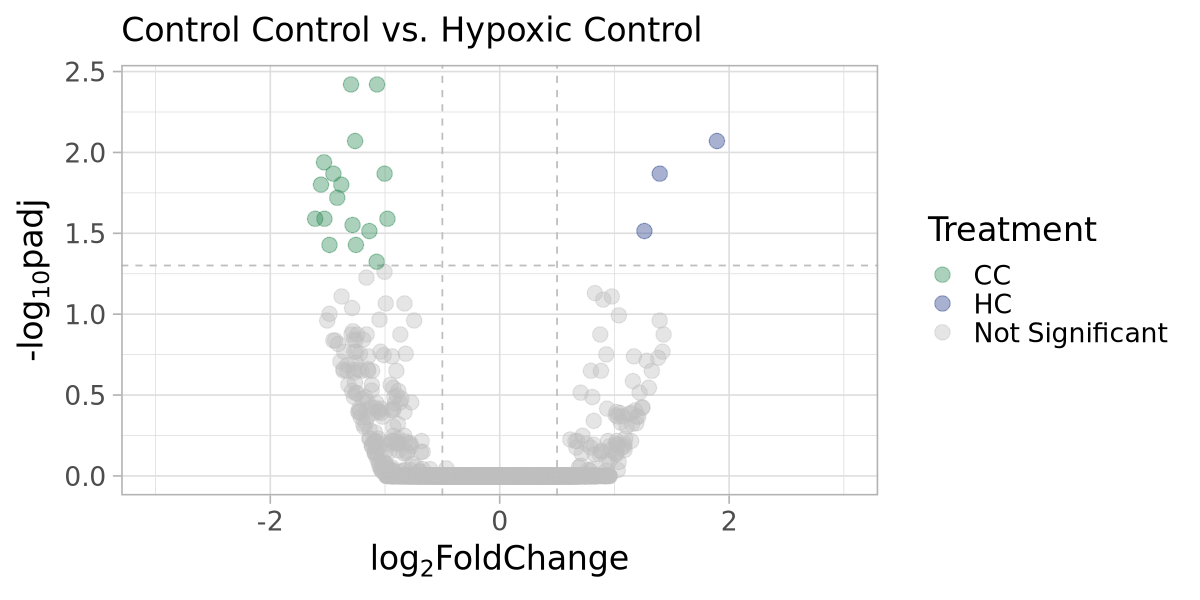

In [15]:
#1 control control vs. hypoxic control
CC_HC <- na.omit(CC_HC) # removing rows with NA for padj

volcano1 <- ggplot(data = CC_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CC', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                       labs(subtitle = 'Control Control vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano1

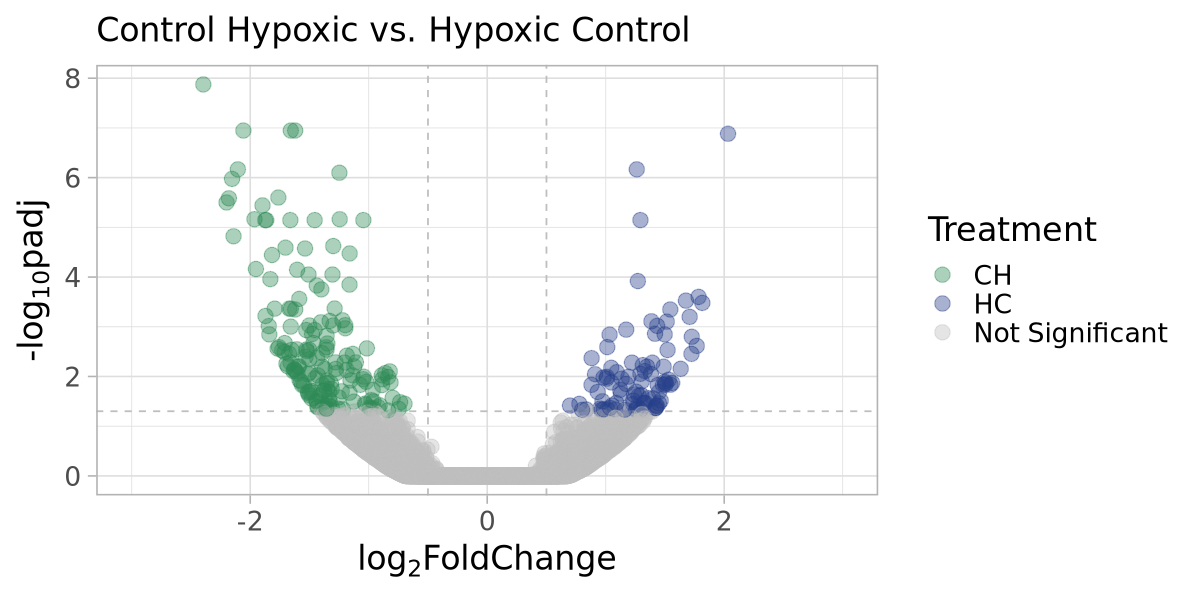

In [16]:
#2 control hypoxic vs. hypoxic control
CH_HC <- na.omit(CH_HC) # removing rows with NA for padj

volcano2 <- ggplot(data = CH_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CH', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Hypoxic vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano2

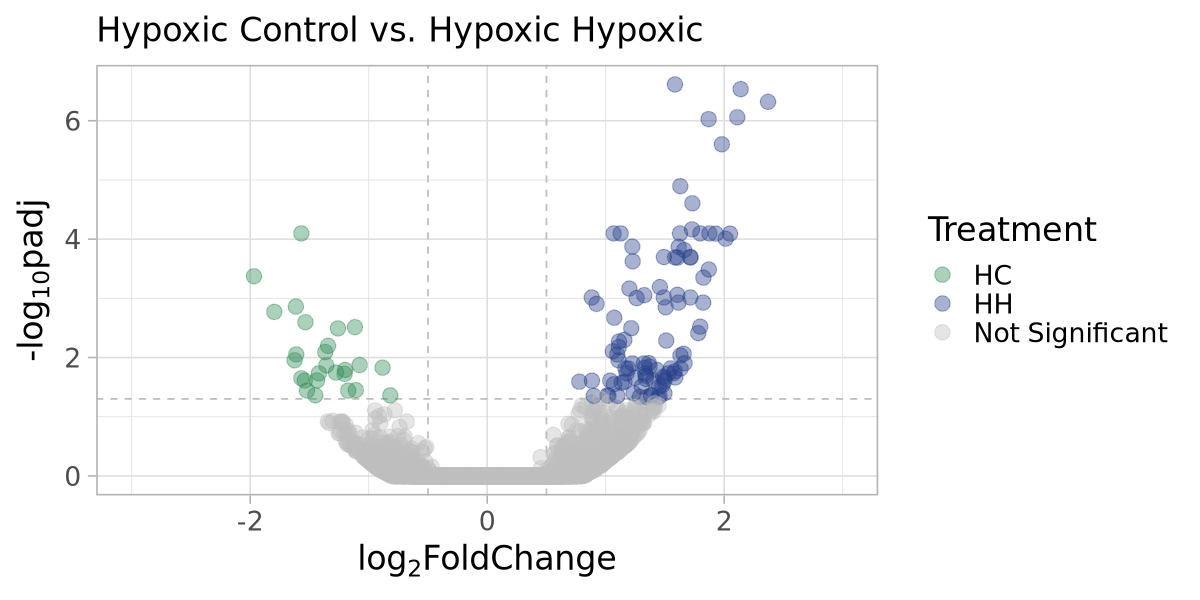

In [17]:
#3 hypoxic hypoxic vs. hypoxic control
HH_HC <- na.omit(HH_HC) # removing rows with NA for padj

volcano3 <- ggplot(data = HH_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('HC', 'HH', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Hypoxic Control vs. Hypoxic Hypoxic',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano3

want to actually flip the above plot so that HC is on the right and HH is on the left - to do this, make pos. LFC to neg and vice versa

In [18]:
# Switch the signs
HH_HC_flip <- HH_HC %>%
  mutate(log2FoldChange = -log2FoldChange)

HH_HC_flip$methyl <- ifelse(HH_HC_flip$log2FoldChange<0 & HH_HC_flip$padj < 0.05, "HH", 
                        ifelse(HH_HC_flip$log2FoldChange>0 & HH_HC_flip$padj < 0.05, "HC", 
                               "not significant"))

# View the modified dataframe
head(HH_HC_flip)
head(HH_HC)


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,LOC111124802,213.00131,0.07669030,0.1125398,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
4,LOC111101273,76.71302,0.06379838,0.1495362,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
5,LOC111101250,123.47481,0.04446060,0.1737339,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
6,LOC111101262,269.44440,0.07196657,0.1174022,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
7,LOC111133260,29.44709,-1.58573394,0.2666112,5.0100451,5.441729e-07,0.0002034527,HH_HC,HH
8,LOC111113503,16.75282,0.47230058,0.2772601,-0.8017763,4.226824e-01,1.0000000000,HH_HC,not significant


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,LOC111124802,213.00131,-0.07669030,0.1125398,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
4,LOC111101273,76.71302,-0.06379838,0.1495362,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
5,LOC111101250,123.47481,-0.04446060,0.1737339,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
6,LOC111101262,269.44440,-0.07196657,0.1174022,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
7,LOC111133260,29.44709,1.58573394,0.2666112,5.0100451,5.441729e-07,0.0002034527,HH_HC,HH
8,LOC111113503,16.75282,-0.47230058,0.2772601,-0.8017763,4.226824e-01,1.0000000000,HH_HC,not significant


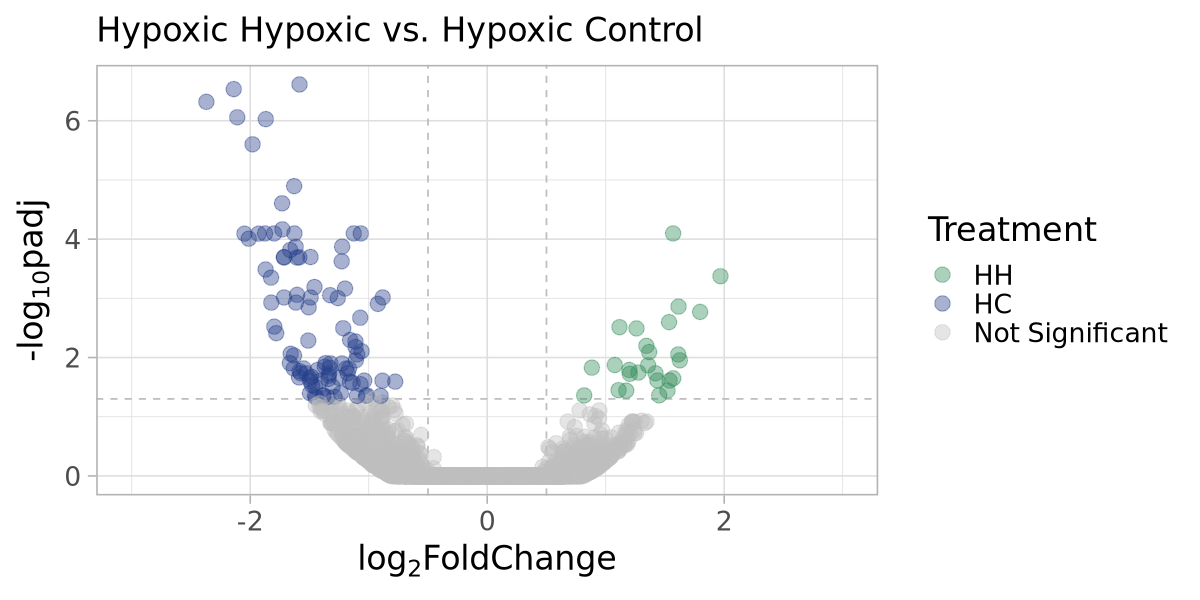

In [19]:
#3 hypoxic hypoxic vs. hypoxic control FLIPPED
volcano3.5 <- ggplot(data = HH_HC_flip, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('HH', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Hypoxic Hypoxic vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano3.5

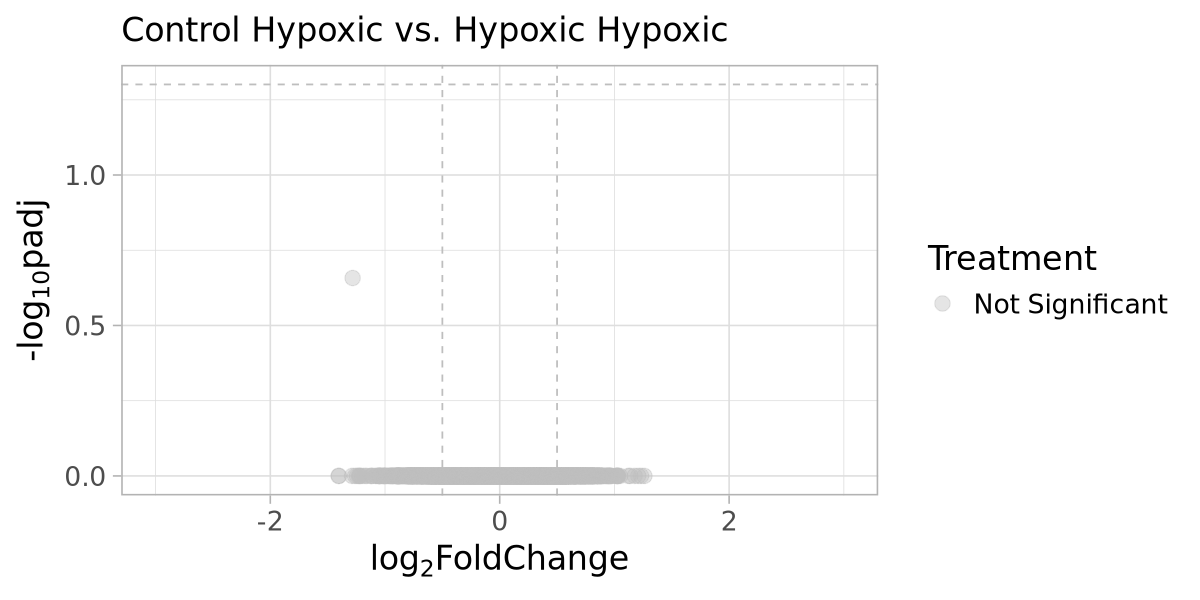

In [20]:
#4 hypoxic hypoxic vs. control hypoxic
HH_CH <- na.omit(HH_CH) # removing rows with NA for padj

volcano4 <- ggplot(data = HH_CH, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('gray'),
                                           labels=c('Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Hypoxic vs. Hypoxic Hypoxic',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano4

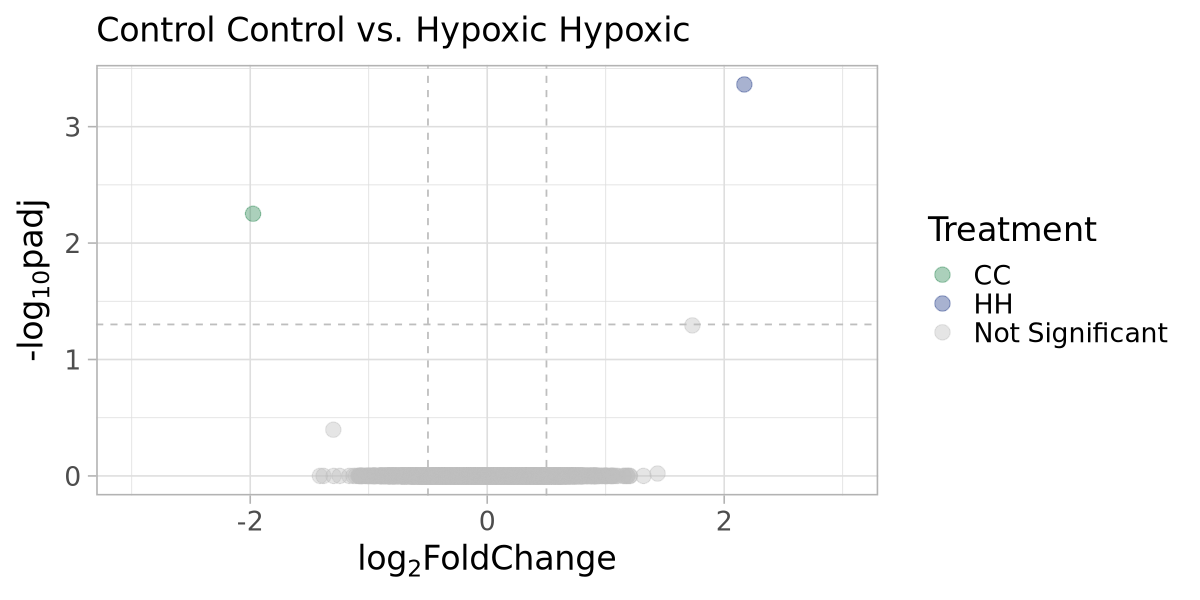

In [21]:
#5 hypoxic hypoxic vs. control control
HH_CC <- na.omit(HH_CC) # removing rows with NA for padj

volcano5 <- ggplot(data = HH_CC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CC', 'HH', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Control vs. Hypoxic Hypoxic',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano5

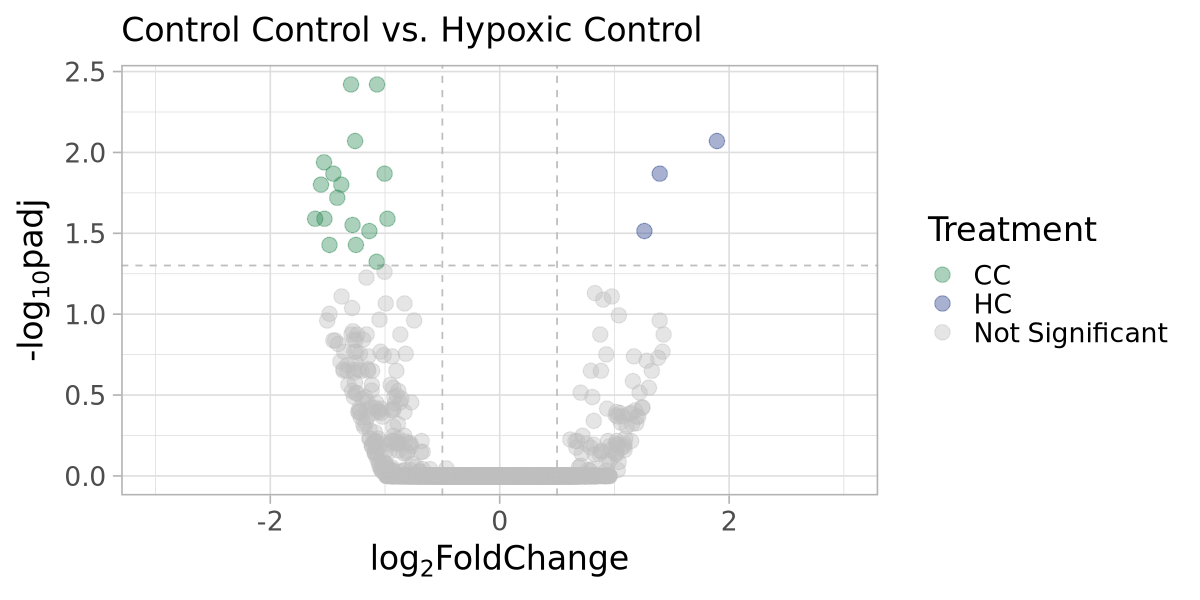

In [22]:
#6 control control vs. control hypoxic
CC_HC <- na.omit(CC_HC) # removing rows with NA for padj

volcano6 <- ggplot(data = CC_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CC', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Control vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano6

putting all the data together into one ggplot grid...

In [23]:
mega_df <- na.omit(rbind(CC_HC, CH_HC, HH_HC_flip, HH_CH, HH_CC, CC_CH))
head(mega_df)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,LOC111124802,213.00131,0.06672759,0.1192547,0.0000000,1.000000e+00,1.00000000,CC_HC,not significant
4,LOC111101273,76.71302,-0.20267259,0.1576994,0.0000000,1.000000e+00,1.00000000,CC_HC,not significant
5,LOC111101250,123.47481,-0.13501125,0.1799700,0.0000000,1.000000e+00,1.00000000,CC_HC,not significant
6,LOC111101262,269.44440,0.14318006,0.1234759,0.0000000,1.000000e+00,1.00000000,CC_HC,not significant
7,LOC111133260,29.44709,-1.41645334,0.2784943,-4.1884287,2.808925e-05,0.01908026,CC_HC,CC
8,LOC111113503,16.75282,0.37259562,0.2901756,0.4224877,6.726691e-01,1.00000000,CC_HC,not significant


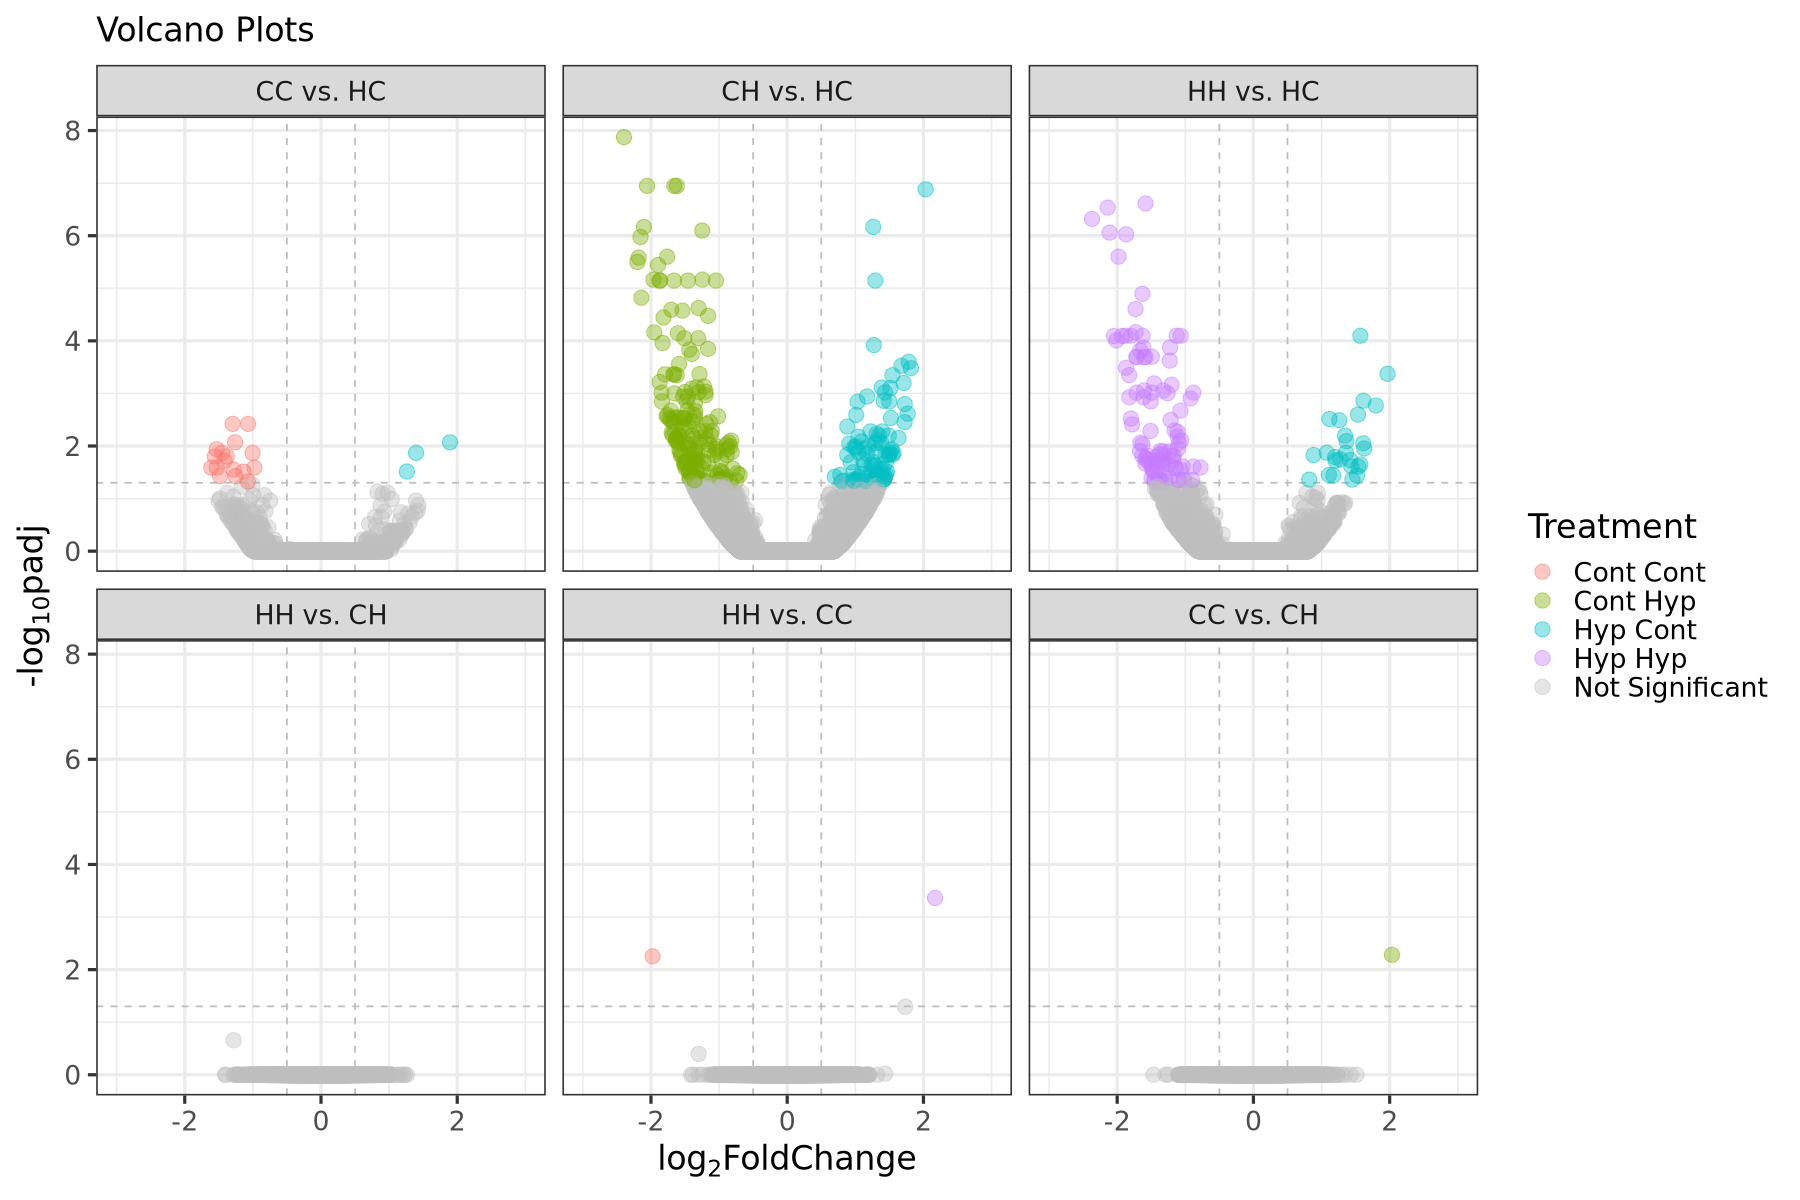

In [24]:
options(repr.plot.width=15, repr.plot.height=10)

# setting order of grids for facet_wrap
mega_df$pair <- factor(mega_df$pair, levels = c('CC_HC','CH_HC','HH_HC', 'HH_CH','HH_CC','CC_CH'))

# renaming grid labels
new_labels <- c(CC_HC = "CC vs. HC", 
                CH_HC = "CH vs. HC", 
                HH_HC = "HH vs. HC",
               HH_CH = "HH vs. CH",
               HH_CC = "HH vs. CC",
               CC_CH = "CC vs. CH")

volcano_MEGA <- ggplot(data = mega_df, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
scale_color_manual(values = c('#F8766D','#7CAE00', '#00BFC4', '#C77CFF', 'gray'),
                                           labels=c('Cont Cont','Cont Hyp', 'Hyp Cont', 'Hyp Hyp', 'Not Significant')) + 
facet_wrap(~pair, labeller = as_labeller(new_labels)) + 
                        theme_bw(base_size=20) + 
                        labs(subtitle = 'Volcano Plots',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_MEGA

just adding another option for how things are labelled

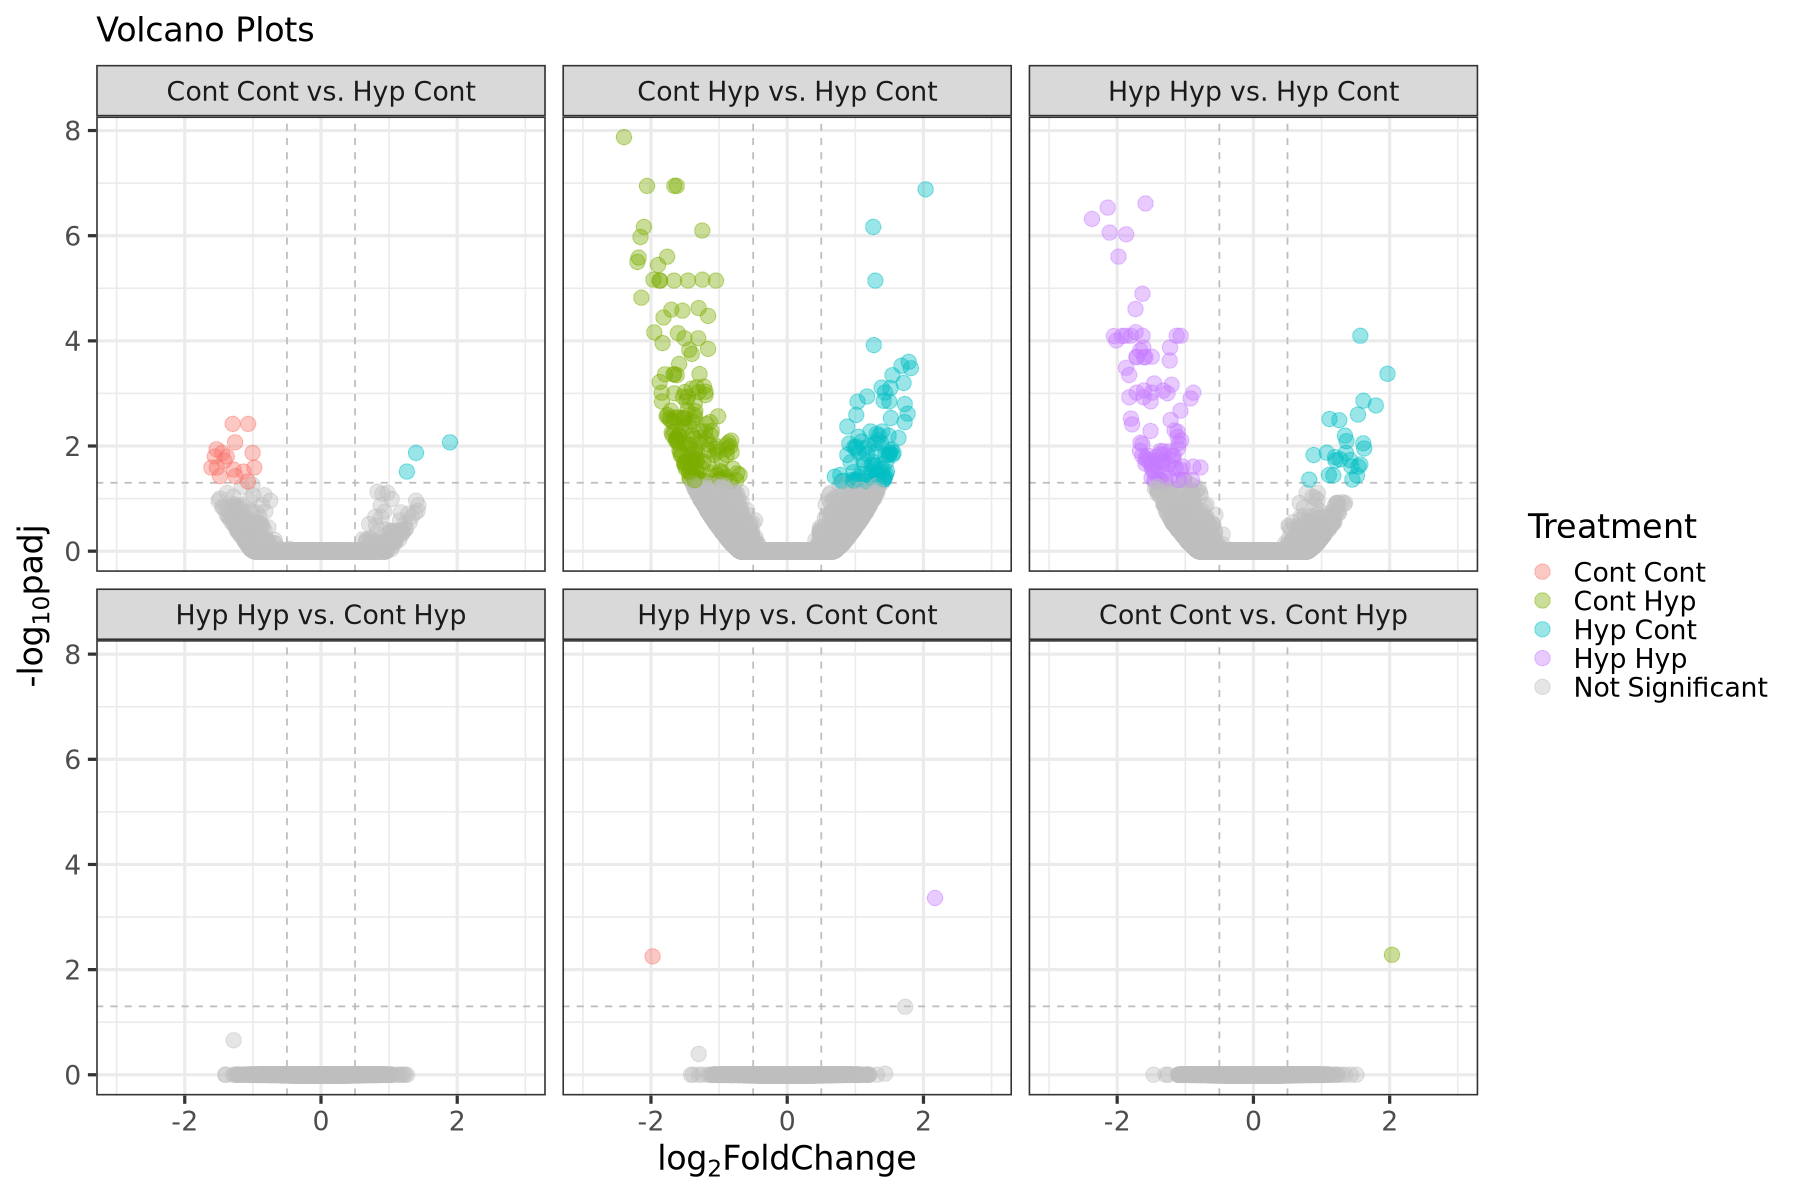

In [25]:
options(repr.plot.width=15, repr.plot.height=10)

# setting order of grids for facet_wrap
mega_df$pair <- factor(mega_df$pair, levels = c('CC_HC','CH_HC','HH_HC', 'HH_CH','HH_CC','CC_CH'))

# renaming grid labels
new_labels <- c(CC_HC = "Cont Cont vs. Hyp Cont", 
                CH_HC = "Cont Hyp vs. Hyp Cont", 
                HH_HC = "Hyp Hyp vs. Hyp Cont",
               HH_CH = "Hyp Hyp vs. Cont Hyp",
               HH_CC = "Hyp Hyp vs. Cont Cont",
               CC_CH = "Cont Cont vs. Cont Hyp")

volcano_MEGA <- ggplot(data = mega_df, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
scale_color_manual(values = c('#F8766D','#7CAE00', '#00BFC4', '#C77CFF', 'gray'),
                                           labels=c('Cont Cont','Cont Hyp', 'Hyp Cont', 'Hyp Hyp', 'Not Significant')) + 
facet_wrap(~pair, labeller = as_labeller(new_labels)) + 
                        theme_bw(base_size=20) + 
                        labs(subtitle = 'Volcano Plots',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_MEGA

### Venn diagram of all sig. DMGs

In [51]:

x = list(A = sig_CC_HC$symbol,
         B = sig_CH_HC$symbol, 
         C = sig_HH_HC$symbol)

names(x) <- c('CC vs. HC',
              'CH vs. HC',
              'HH vs. HC')

# same colors as used in the volcano plots
custom_colors <- c('#F8766D',  '#7CAE00', '#C77CFF')

png(filename="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/venn_genes/venn_diagram.png")


ggvenn(x,
      set_name_size = 6,
       text_size = 7,
      stroke_size = 0.5, 
       show_percentage = TRUE,
      fill_color = custom_colors)

dev.off()

png 
  2

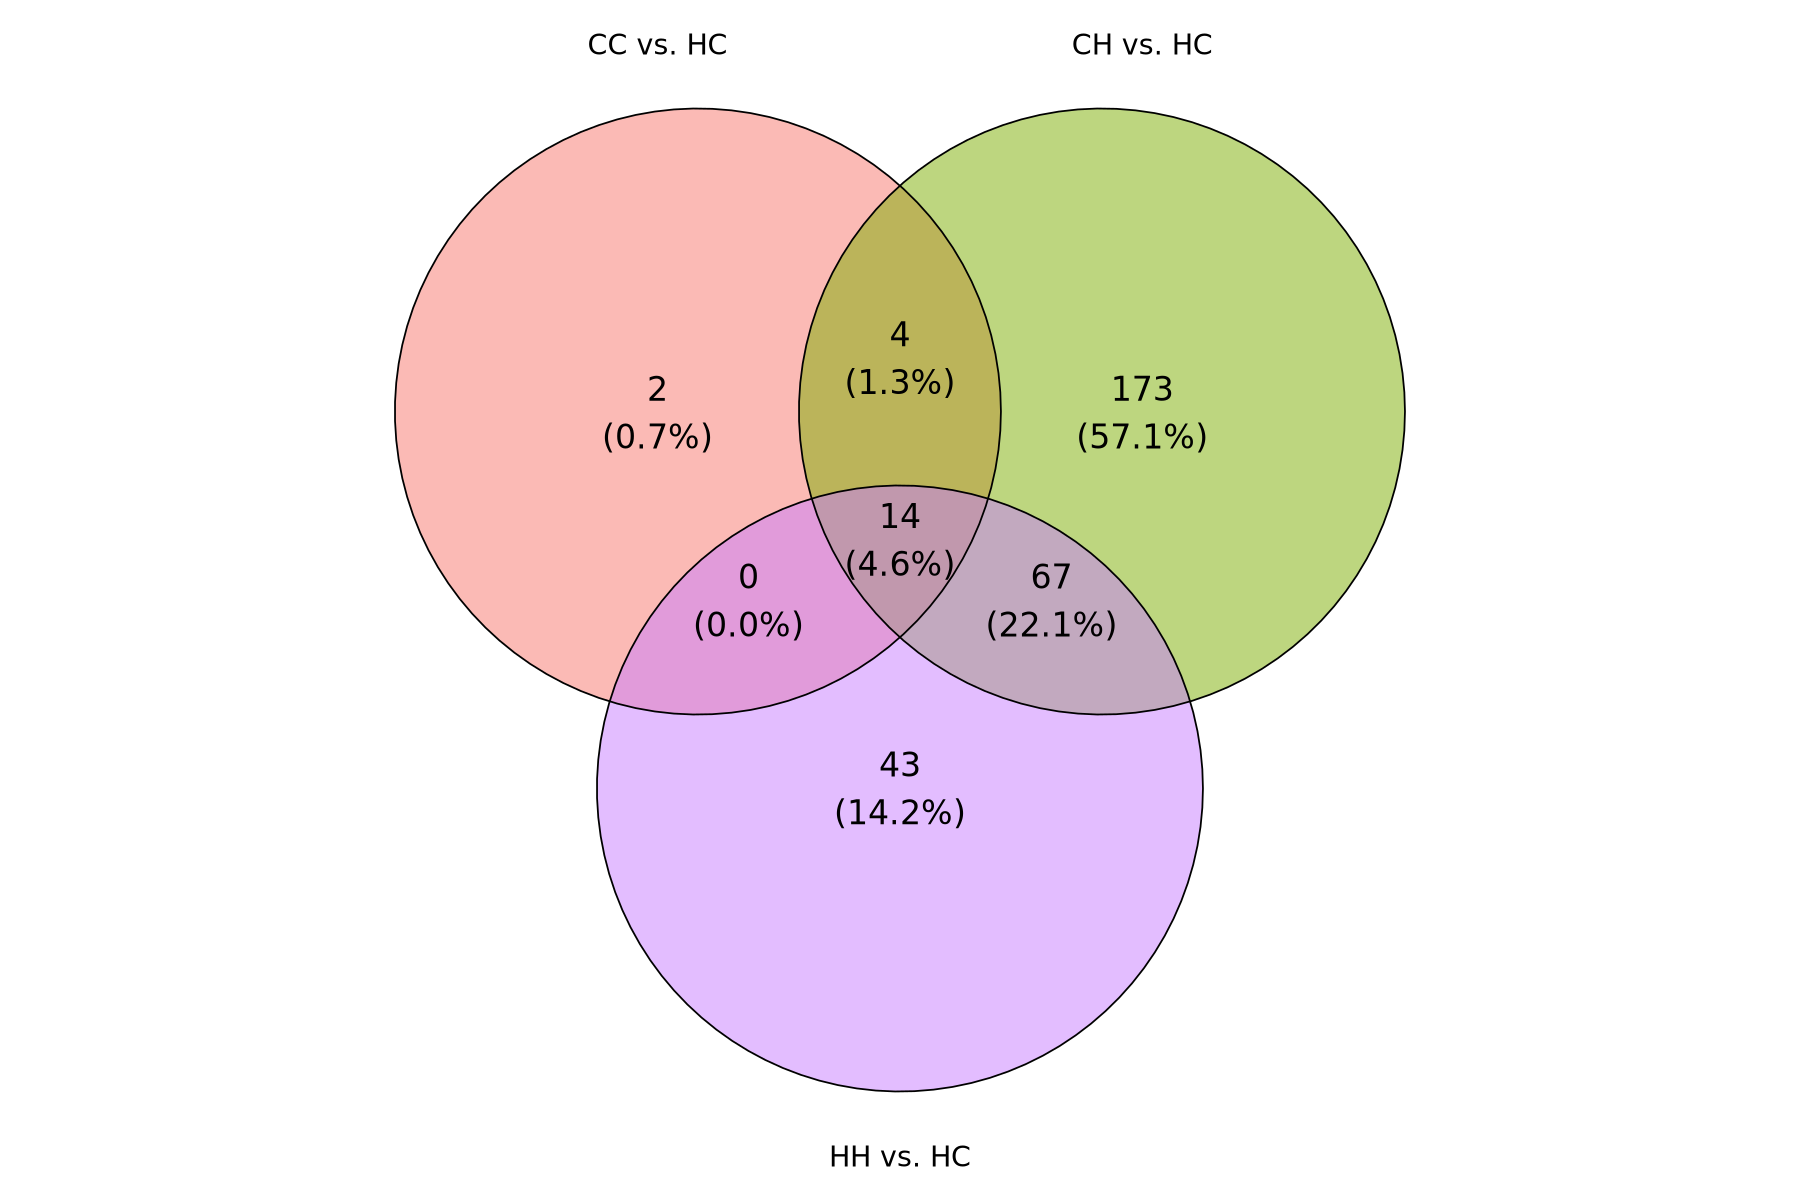

In [52]:
ggvenn(x,
      set_name_size = 6,
       text_size = 7,
      stroke_size = 0.5, 
       show_percentage = TRUE,
      fill_color = custom_colors)

In [ ]:
png(filename="your/file/location/name.png")
plot(fit)
dev.off()

### shared sig DMGs for the pairwise comparisons

In [53]:
# pulling out the 14 shared genes

# Merge the data frames on the 'gene' column
shared_genes14 <- Reduce(function(x, y) merge(x, y, by = "symbol"), list(sig_CC_HC_genes, sig_CH_HC_genes, sig_HH_HC_genes))

shared_genes14 <- as.data.frame(shared_genes14)
                    
# View the result
dim(shared_genes14)


[1] 14 22

In [54]:
head(shared_genes14)

,symbol,baseMean.x,log2FC.x,lfcSE.x,stat.x,pvalue.x,padj.x,name.x,baseMean.y,log2FC.y,⋯,pvalue.y,padj.y,name.y,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111103340,13.95419,-1.484161,0.3153770,-3.913288,9.104789e-05,0.037304738,uncharacterized LOC111103340,13.95419,-2.395991,⋯,1.530161e-12,1.335983e-08,uncharacterized LOC111103340,13.95419,2.109819,0.2971818,6.258186,3.894812e-10,8.737037e-07,uncharacterized LOC111103340
2,LOC111117760,138.93665,-1.531863,0.2865488,-4.473454,7.696623e-06,0.011501833,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3",138.93665,-1.370685,⋯,9.448902e-05,7.111928e-03,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3",138.93665,1.363854,0.2845532,3.914395,9.063112e-05,1.244181e-02,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3"
3,LOC111119327,13.28867,-1.558224,0.3076599,-4.252177,2.117020e-05,0.015818372,"calcyphosin-like protein, transcript variant X3",13.28867,-1.964294,⋯,1.177767e-08,6.855392e-06,"calcyphosin-like protein, transcript variant X3",13.28867,2.139134,0.2892416,6.531335,6.518601e-11,2.924570e-07,"calcyphosin-like protein, transcript variant X3"
4,LOC111123492,43.85755,-1.295889,0.2139553,-4.888353,1.016832e-06,0.003798884,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11",43.85755,-1.620859,⋯,5.127174e-11,1.130002e-07,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11",43.85755,1.584144,0.2002911,6.661022,2.719295e-11,2.440023e-07,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11"
5,LOC111124465,10.62118,-1.609193,0.3330425,-4.081141,4.481521e-05,0.025712231,"elongation factor G, mitochondrial-like",10.62118,-2.180085,⋯,3.277543e-09,2.601475e-06,"elongation factor G, mitochondrial-like",10.62118,1.929853,0.3200680,5.248426,1.534042e-07,8.097033e-05,"elongation factor G, mitochondrial-like"
6,LOC111124669,35.87770,-1.381409,0.2649979,-4.269501,1.959111e-05,0.015818372,"serine/threonine-protein kinase SIK3-like, transcript variant X1",35.87770,-1.604517,⋯,2.370161e-07,7.135820e-05,"serine/threonine-protein kinase SIK3-like, transcript variant X1",35.87770,1.457555,0.2552206,4.731416,2.229591e-06,6.453587e-04,"serine/threonine-protein kinase SIK3-like, transcript variant X1"


In [55]:
write.csv(shared_genes14, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/venn_genes/14shared_genes.csv')

pulling out the **81 shared genes between HH vs. HC and CH vs. HC**

In [56]:
# pulling out the 81 shared genes

# Merge the data frames on the 'gene' column
shared_genes81 <- Reduce(function(x, y) merge(x, y, by = "symbol"), list(sig_CH_HC_genes, sig_HH_HC_genes))
                    
shared_genes81 <- as.data.frame(shared_genes81)

# View the result
dim(shared_genes81)


[1] 81 15

In [57]:
head(shared_genes81)

,symbol,baseMean.x,log2FC.x,lfcSE.x,stat.x,pvalue.x,padj.x,name.x,baseMean.y,log2FC.y,lfcSE.y,stat.y,pvalue.y,padj.y,name.y
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111099548,42.89749,-1.299708,0.1939971,-5.410949,6.269163e-08,2.379829e-05,kinesin-like protein KIF17,42.89749,1.071897,0.1866766,4.402785,1.068701e-05,2.130990e-03,kinesin-like protein KIF17
2,LOC111099571,29.77511,-1.702293,0.2694320,-5.390204,7.037772e-08,2.560283e-05,histone RNA hairpin-binding protein-like,29.77511,1.868561,0.2605608,6.211837,5.236873e-10,9.398093e-07,histone RNA hairpin-binding protein-like
3,LOC111100608,22.80004,-1.501010,0.2764608,-4.525090,6.036979e-06,9.412297e-04,DDRGK domain-containing protein 1-like,22.80004,1.616395,0.2667483,5.122415,3.016477e-07,1.353342e-04,DDRGK domain-containing protein 1-like
4,LOC111100898,38.23971,-1.329026,0.2349495,-4.592586,4.377874e-06,7.644643e-04,"uncharacterized LOC111100898, transcript variant X3",38.23971,1.069928,0.2282000,3.593025,3.268615e-04,2.820124e-02,"uncharacterized LOC111100898, transcript variant X3"
5,LOC111101237,34.20465,-1.305943,0.2064128,-5.115688,3.126000e-07,8.905514e-05,putative 2'-deoxynucleoside 5'-phosphate N-hydrolase 1,34.20465,1.227931,0.1972626,4.957507,7.140340e-07,2.372973e-04,putative 2'-deoxynucleoside 5'-phosphate N-hydrolase 1
6,LOC111101291,18.75414,-1.864671,0.2849064,-5.667373,1.450036e-08,7.149875e-06,dnaJ homolog subfamily C member 27-like,18.75414,1.662740,0.2775448,5.090135,3.578095e-07,1.528869e-04,dnaJ homolog subfamily C member 27-like


pulling out the **67 genes shared ONLY between HH vs. HC and CH vs. HC**

In [58]:
# to remove the 14 genes that are shared between all the comparisons, and to only look at those shared between just these two...
shared_genes67 <- shared_genes81[!shared_genes81$symbol %in% shared_genes14$symbol, ]
dim(shared_genes67)

[1] 67 15

In [60]:
head(shared_genes67)

,symbol,baseMean.x,log2FC.x,lfcSE.x,stat.x,pvalue.x,padj.x,name.x,baseMean.y,log2FC.y,lfcSE.y,stat.y,pvalue.y,padj.y,name.y
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111099548,42.89749,-1.299708,0.1939971,-5.410949,6.269163e-08,2.379829e-05,kinesin-like protein KIF17,42.89749,1.071897,0.1866766,4.402785,1.068701e-05,2.130990e-03,kinesin-like protein KIF17
2,LOC111099571,29.77511,-1.702293,0.2694320,-5.390204,7.037772e-08,2.560283e-05,histone RNA hairpin-binding protein-like,29.77511,1.868561,0.2605608,6.211837,5.236873e-10,9.398093e-07,histone RNA hairpin-binding protein-like
3,LOC111100608,22.80004,-1.501010,0.2764608,-4.525090,6.036979e-06,9.412297e-04,DDRGK domain-containing protein 1-like,22.80004,1.616395,0.2667483,5.122415,3.016477e-07,1.353342e-04,DDRGK domain-containing protein 1-like
4,LOC111100898,38.23971,-1.329026,0.2349495,-4.592586,4.377874e-06,7.644643e-04,"uncharacterized LOC111100898, transcript variant X3",38.23971,1.069928,0.2282000,3.593025,3.268615e-04,2.820124e-02,"uncharacterized LOC111100898, transcript variant X3"
5,LOC111101237,34.20465,-1.305943,0.2064128,-5.115688,3.126000e-07,8.905514e-05,putative 2'-deoxynucleoside 5'-phosphate N-hydrolase 1,34.20465,1.227931,0.1972626,4.957507,7.140340e-07,2.372973e-04,putative 2'-deoxynucleoside 5'-phosphate N-hydrolase 1
6,LOC111101291,18.75414,-1.864671,0.2849064,-5.667373,1.450036e-08,7.149875e-06,dnaJ homolog subfamily C member 27-like,18.75414,1.662740,0.2775448,5.090135,3.578095e-07,1.528869e-04,dnaJ homolog subfamily C member 27-like


In [61]:
write.csv(shared_genes67, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/venn_genes/67shared_genes.csv')

pulling out the **18 genes shared bewteen CC vs. HC and CH vs. HC**

In [62]:
# pulling out the 18 shared genes

# Merge the data frames on the 'gene' column
shared_genes18 <- Reduce(function(x, y) merge(x, y, by = "symbol"), list(sig_CC_HC_genes, sig_CH_HC_genes))  
shared_genes18 <- as.data.frame(shared_genes18)

dim(shared_genes18)

[1] 18 15

In [63]:
head(shared_genes18)

,symbol,baseMean.x,log2FC.x,lfcSE.x,stat.x,pvalue.x,padj.x,name.x,baseMean.y,log2FC.y,lfcSE.y,stat.y,pvalue.y,padj.y,name.y
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111103340,13.95419,-1.484161,0.3153770,-3.913288,9.104789e-05,0.037304738,uncharacterized LOC111103340,13.95419,-2.3959913,0.3034607,-7.071728,1.530161e-12,1.335983e-08,uncharacterized LOC111103340
2,LOC111113022,22.96539,-1.528308,0.3144857,-4.064756,4.808269e-05,0.025712231,uncharacterized protein KIAA0930 homolog,22.96539,-1.8305886,0.3119173,-5.067332,4.034298e-07,1.100733e-04,uncharacterized protein KIAA0930 homolog
3,LOC111114112,52.68868,-1.072362,0.2145884,-3.832275,1.269639e-04,0.047433702,uncharacterized LOC111114112,52.68868,-0.9779233,0.2142951,-3.396827,6.817213e-04,2.991009e-02,uncharacterized LOC111114112
4,LOC111117760,138.93665,-1.531863,0.2865488,-4.473454,7.696623e-06,0.011501833,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3",138.93665,-1.3706846,0.2870368,-3.904324,9.448902e-05,7.111928e-03,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3"
5,LOC111119327,13.28867,-1.558224,0.3076599,-4.252177,2.117020e-05,0.015818372,"calcyphosin-like protein, transcript variant X3",13.28867,-1.9642936,0.3005996,-5.702914,1.177767e-08,6.855392e-06,"calcyphosin-like protein, transcript variant X3"
6,LOC111123492,43.85755,-1.295889,0.2139553,-4.888353,1.016832e-06,0.003798884,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11",43.85755,-1.6208588,0.2087434,-6.567195,5.127174e-11,1.130002e-07,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11"


pulling out the **4 genes shared between ONLY CC vs. HC and CH vs. HC**

In [64]:
# to remove the 4 genes that are shared between all the comparisons, and to only look at those shared between just these two...
shared_genes4 <- shared_genes18[!shared_genes18$symbol %in% shared_genes14$symbol, ]
dim(shared_genes4)

[1]  4 15

In [65]:
head(shared_genes4)

,symbol,baseMean.x,log2FC.x,lfcSE.x,stat.x,pvalue.x,padj.x,name.x,baseMean.y,log2FC.y,lfcSE.y,stat.y,pvalue.y,padj.y,name.y
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2,LOC111113022,22.96539,-1.528308,0.3144857,-4.064756,4.808269e-05,0.02571223,uncharacterized protein KIAA0930 homolog,22.96539,-1.8305886,0.3119173,-5.067332,4.034298e-07,1.100733e-04,uncharacterized protein KIAA0930 homolog
3,LOC111114112,52.68868,-1.072362,0.2145884,-3.832275,1.269639e-04,0.04743370,uncharacterized LOC111114112,52.68868,-0.9779233,0.2142951,-3.396827,6.817213e-04,2.991009e-02,uncharacterized LOC111114112
12,LOC111129145,16.05494,1.261038,0.2539631,3.981044,6.861325e-05,0.03061818,FERM domain-containing protein 8-like,16.05494,1.1922517,0.2494725,3.776977,1.587436e-04,1.011672e-02,FERM domain-containing protein 8-like
15,LOC111133874,106.19085,-1.003173,0.1728608,-4.357110,1.317910e-05,0.01353090,uncharacterized LOC111133874,106.19085,-1.1608173,0.1709847,-5.326893,9.990702e-08,3.354954e-05,uncharacterized LOC111133874


In [66]:
write.csv(shared_genes4, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/venn_genes/4shared_genes.csv')

### unique sig DMGs for pairwise comparison

pulling out the **173 unique sig DMGs for CH vs. HC**

In [68]:
unique_CH_HC <- sig_CH_HC_genes[!sig_CH_HC_genes$symbol %in% c(shared_genes14$symbol, shared_genes4$symbol, shared_genes67$symbol), ]
dim(unique_CH_HC)

[1] 173   8

In [69]:
head(unique_CH_HC)

,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111099029,22.806865,-1.312153,0.2971206,-3.574821,3.504671e-04,0.017833625,transient receptor potential cation channel subfamily M member 6-like
4,LOC111099585,35.903134,1.009625,0.2012921,3.773745,1.608155e-04,0.010174491,lys-63-specific deubiquitinase BRCC36-like
5,LOC111099623,17.167220,-1.273188,0.2664346,-3.840297,1.228857e-04,0.008515196,"methionine--tRNA ligase, mitochondrial-like"
6,LOC111100220,15.848160,-1.393082,0.2899465,-3.942391,8.067323e-05,0.006345567,"proteasomal ATPase-associated factor 1-like, transcript variant X2"
7,LOC111100492,9.397644,1.499138,0.3382848,3.692562,2.220063e-04,0.012752217,"uncharacterized LOC111100492, transcript variant X1"
10,LOC111101148,33.827761,1.036371,0.2420076,3.249366,1.156627e-03,0.042790309,"ADP-ribosylation factor GTPase-activating protein 2-like, transcript variant X1"


In [70]:
write.csv(unique_CH_HC, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/venn_genes/173unique_genes_CHvHC.csv')

pulling out the **2 unique sig DMGs for CC vs. HC**

In [71]:
unique_CC_HC <- sig_CC_HC_genes[!sig_CC_HC_genes$symbol %in% c(shared_genes14$symbol, shared_genes4$symbol), ]
dim(unique_CC_HC)

[1] 2 8

In [72]:
head(unique_CC_HC)

,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4,LOC111117745,108.232103,-1.260957,0.2193566,-4.608736,4.05125e-06,0.00849996,"uncharacterized LOC111117745, transcript variant X5"
13,LOC111129122,6.526204,1.893684,0.3585291,4.584520,4.55030e-06,0.00849996,"Bardet-Biedl syndrome 12 protein homolog, transcript variant X2"


In [73]:
write.csv(unique_CC_HC, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/venn_genes/2unique_genes_CCvHC.csv')

pulling out the **43 unique sig DMGs for HH vs. HC**

In [74]:
unique_HH_HC <- sig_HH_HC_genes[!sig_HH_HC_genes$symbol %in% c(shared_genes14$symbol, shared_genes67$symbol), ]
dim(unique_HH_HC)

[1] 43  8

In [75]:
head(unique_HH_HC)

,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,LOC111099928,11.398944,1.3046784,0.2959526,3.563674,3.657007e-04,0.030956912,uncharacterized LOC111099928
6,LOC111101122,25.839618,-1.1731864,0.2628607,-3.512075,4.446230e-04,0.036269114,lysophospholipid acyltransferase 7-like
12,LOC111103618,41.852718,-0.8181624,0.1647570,-3.448487,5.637358e-04,0.043606909,"protein phosphatase 1 regulatory subunit 32-like, transcript variant X2"
13,LOC111104153,15.573645,1.3707949,0.2902406,3.861606,1.126439e-04,0.014235968,X-ray repair cross-complementing protein 5-like
22,LOC111109809,2.627327,1.7807404,0.3607403,4.243331,2.202262e-05,0.003874686,peroxisome proliferator-activated receptor delta-like
24,LOC111110897,42.822947,-1.3432425,0.2657618,-4.113618,3.895061e-05,0.006354615,"E3 ubiquitin-protein ligase TRIM71-like, transcript variant X1"


In [76]:
write.csv(unique_HH_HC, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/venn_genes/43unique_genes_HHvHC.csv')

Now have multiple dfs that contain shared and unique sig DMGs from the Venn diagram of pairwise comparisons with HC

**Shared sig DMGs**:
- shared_genes14 - shared between all 3 comparisons
- shared_genes67 - shared *ONLY* between HH vs. HC and CH vs. HC
- shared_genes81 - shared between HH vs. HC and CH vs. HC (including the 14 that are shared between all)
- shared_genes18 - shared between CC vs. HC and CH vs. HC (including the 14 that are shared between all)
- shared_genes4 - shared *ONLY* between CC vs. HC and CH vs. HC

**Unique sig DMGs**:
- unique_HH_HC - 43 sig DMGs
- unique_CH_HC - 173 sig DMGs
- unique_CC_HC - 2 sig DMGs

## GO TERMS of DMGs
Assigning functional categories to DMG

This is being done with [g:Profiler](https://cran.r-project.org/web/packages/gprofiler2/vignettes/gprofiler2.html)

I'm mainly using the **g:GOst tool**, which enables functional profiling of gene lists
- ordered_query = FALSE, meaning the order of genes will *not* be taken into account
- significant = TRUE, returns only the statistically significant results

### shared DMGs

In [ ]:
#BiocManager::install("gprofiler2")
library(gprofiler2)

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)

shared_genes14 - **14 DMGs shared between all 3 comparisons**

In [ ]:
gene_list14 <- shared_genes14$X

# Run g:Profiler analysis
gost_results14 <- gost(gene_list14, organism = "cvgca002022765v4")  # Use the correct organism code


# Check the results
results14 <- gost_results14$result
head(results14)

there aren't any significant GO terms for these 14 genes... this can happen with small queries of not directly related genes - can instead look at 'All results' to show terms where at least one input gene belongs to.





In [ ]:
gene_list14 <- shared_genes14$X

# Run g:Profiler analysis
gost_results14 <- gost(gene_list14, organism = "cvgca002022765v4", significant = FALSE)  # Use the correct organism code


# Check the results
results14 <- gost_results14$result
results14 <- results14 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results14)

# Create a bar plot of the top 10 significant terms
top_terms14 <- head(results14[order(results14$p_value), ], 10)

ggplot(top_terms14, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values = c('#F8766D',  '#7CAE00', '#C77CFF'), name = "GO Category") +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "14 shared genes among all comparisons") +
  theme_light()


In [ ]:
top_terms14$term_name

In [ ]:
BP_shared14 <- filter(results14, results14$source == "GO:BP")

BP_shared14 <- (BP_shared14[order(BP_shared14$p_value),])

head(BP_shared14)

head(BP_shared14$term_name,10)
head(BP_shared14$term_id, 5)

might be easier to interpret if I can pull out the parent GO term instead

In [ ]:
library(clusterProfiler)

In [ ]:
dim(BP_shared14)

In [ ]:
# Get term information
parent_terms <- go2term(BP_shared14$parents)

# get counts for the parent terms
parent_term_counts <- BP_shared14 %>% 
  group_by(parents) %>% 
  summarise(count = n())

# create df of counts
parents_df <- as.data.frame(parent_term_counts)
colnames(parents_df) <- c("go_id", "count")

# combine dfs to have the go_id, parent term, and number of children GO terms identified in ORA
parents_df <- merge(parent_terms, parents_df, by = "go_id")
parents_df

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)

ggplot(parents_df, aes(x = reorder(Term, count), y = count)) + 
geom_col() +
coord_flip() + 
theme_bw(base_size = 20) +
labs(x = "Parent GO term",
     y = "Counts",
     title = "Biological Process GO Terms",
     subtitle = "14 DMGs shared among all comparisons with HC")

shared_genes67 - **67 DMGs shared ONLY between HH_HC and CH_HC**

In [ ]:
gene_list67 <- shared_genes67$X

# Run g:Profiler analysis
gost_results67 <- gost(gene_list67, organism = "cvgca002022765v4", ordered_query = FALSE)  # Use the correct organism code

# Check the results
results67 <- gost_results67$result
results67 <- results67 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results67)

In [ ]:
# Create a bar plot of the top 10 significant terms
top_terms67 <- head(results67[order(results67$p_value), ], 10)

ggplot(top_terms67, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
scale_fill_manual(values = c('#C77CFF', '#7CAE00'), name = "GO category") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "67 genes shared between CC_HC and CH_HC") +
  theme_light()


In [ ]:
top_terms67$term_name

In [ ]:
gost_results67 <- gost(gene_list67, organism = "cvgca002022765v4", ordered_query = FALSE, significant=FALSE)  # Use the correct organism code

# Check the results
results67 <- gost_results67$result
results67 <- results67 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part

BP_shared67 <- filter(results67, results67$source == "GO:BP")

BP_shared67 <- (BP_shared67[order(BP_shared67$p_value),])

head(BP_shared67)

head(BP_shared67$term_name,10)
head(BP_shared67$term_id, 5)



shared_genes81 - **81 DMGs shared between HH_HC and CH_HC** (including the 14 shared between all)

In [ ]:
gene_list81 <- shared_genes81$X

# Run g:Profiler analysis
gost_results81 <- gost(gene_list81, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results81 <- gost_results81$result
head(results81)

In [ ]:
# Create a bar plot of the top 10 significant terms
top_terms81 <- head(results81[order(results81$p_value), ], 10)

ggplot(top_terms81, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms") +
  theme_light()


shared_genes18 - **shared between CC_HC and CH_HC** (including the 14 shared between all)

In [ ]:
gene_list18 <- shared_genes18$X

# Run g:Profiler analysis
gost_results18 <- gost(gene_list18, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results18 <- gost_results18$result
head(results18)

no significant GO terms in the list of 18 ... looking at all genes

In [ ]:
gene_list18 <- shared_genes18$X

# Run g:Profiler analysis
gost_results18 <- gost(gene_list18, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results18 <- gost_results18$result

# Create a bar plot of the top 10 significant terms
top_terms18 <- head(results18[order(results18$p_value), ], 10)

ggplot(top_terms18, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms") +
  theme_light()



shared_genes4 - **shared ONLY between CC_HC and CH_HC**

In [ ]:
gene_list4 <- shared_genes4$X

# Run g:Profiler analysis
gost_results4 <- gost(gene_list4, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results4 <- gost_results4$result
results4 <- results4 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results4)

no significant GO terms in the list of 4...looking at all genes

In [ ]:
gene_list4 <- shared_genes4$X

# Run g:Profiler analysis
gost_results4 <- gost(gene_list4, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results4 <- gost_results4$result
results4 <- results4 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results4)

# Create a bar plot of the top 10 significant terms
top_terms4 <- head(results4[order(results4$p_value), ], 10)

ggplot(top_terms4, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values = c('#C77CFF', '#7CAE00'), name = "GO category") +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "4 genes shared between CC_HC and CH_HC") +
  theme_light()

In [ ]:
top_terms4$term_name

In [ ]:
BP_shared4 <- filter(results4, results4$source == "GO:BP")

BP_shared4 <- (BP_shared4[order(BP_shared4$p_value),])

head(BP_shared4)

head(BP_shared4$term_name,10)



### unique DMGs

unique_HH_HC - **DMGs unique to HH vs. HC comparison**

(43 sig DMGs)

In [ ]:
gene_list43 <- unique_HH_HC$X

# Run g:Profiler analysis
gost_results43 <- gost(gene_list43, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results43 <- gost_results43$result
results43 <- results43 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results43)

In [ ]:
# Create a bar plot of the top 10 significant terms
top_terms43 <- head(results43[order(results43$p_value), ], 10)

ggplot(top_terms43, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values = c('#F8766D',  '#7CAE00', '#C77CFF'), name = "GO category") +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "43 genes unique to HH_HC") +
  theme_light()


looking for top 10, regardless of significance

In [ ]:
gene_list43 <- unique_HH_HC$X

# Run g:Profiler analysis
gost_results43 <- gost(gene_list43, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results43 <- gost_results43$result
results43 <- results43 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results43)

# Create a bar plot of the top 10 significant terms
top_terms43 <- head(results43[order(results43$p_value), ], 10)

ggplot(top_terms43, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values = c('#F8766D', '#C77CFF', '#7CAE00'), name = "GO category") +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "43 genes unique to HH_HC") +
  theme_light()

In [ ]:
top_terms43$term_name

In [ ]:
BP_shared43 <- filter(results43, results43$source == "GO:BP")

BP_shared43 <- (BP_shared43[order(BP_shared43$p_value),])

head(BP_shared43)

head(BP_shared43$term_name,10)
head(BP_shared43$term_id, 5)

unique_CH_HC - **DMGs unique to CH vs. HC**

(173 sig DMGs)

In [ ]:
gene_list173 <- unique_CH_HC$X

# Run g:Profiler analysis
gost_results173 <- gost(gene_list173, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results173 <- gost_results173$result
head(results173)

no significant GO terms, so looking at not significant

In [ ]:
gene_list173 <- unique_CH_HC$X

# Run g:Profiler analysis
gost_results173 <- gost(gene_list173, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results173 <- gost_results173$result
results173 <- results173 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results173)

# Create a bar plot of the top 10 significant terms
top_terms173 <- head(results173[order(results173$p_value), ], 10)

ggplot(top_terms173, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values = c('#F8766D', '#C77CFF', '#7CAE00'), name = "GO category") +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "173 genes unique to CH_HC") +
  theme_light()

In [ ]:
top_terms173$term_name

In [ ]:
BP_shared173 <- filter(results173, results173$source == "GO:BP")

BP_shared173 <- (BP_shared173[order(BP_shared173$p_value),])

head(BP_shared173)

head(BP_shared173$term_name,10)
head(BP_shared173$term_id, 5)

unique_CC_HC - **DMGs unique to CC vs. HC**

(2 sig DMGs)

In [ ]:
gene_list2 <- unique_CC_HC$X

# Run g:Profiler analysis
gost_results2 <- gost(gene_list2, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results2 <- gost_results2$result
head(results2)

no significant GO terms, so looking at not significant

In [ ]:
gene_list2 <- unique_CC_HC$X

# Run g:Profiler analysis
gost_results2 <- gost(gene_list2, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results2 <- gost_results2$result
results2 <- results2 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results2)

# Create a bar plot of the top 10 significant terms
top_terms2 <- head(results2[order(results2$p_value), ], 10)

ggplot(top_terms2, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  scale_fill_manual(values = c('#F8766D', '#C77CFF', '#7CAE00'), name = "GO category") +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "2 genes unique to CC_HC") +
  theme_light()

In [ ]:
top_terms2$term_name

In [ ]:
BP_shared2 <- filter(results2, results2$source == "GO:BP")

BP_shared2 <- (BP_shared2[order(BP_shared2$p_value),])

head(BP_shared2)

head(BP_shared2$term_name,10)
head(BP_shared2$term_id, 5)

### better visualization of GO terms?

I'm going to combine the dfs to be able to plot in a grid

In [ ]:
top_terms14$OG <- "shared_genes14"
top_terms67$OG <- "shared_genes67"
top_terms4$OG <- "shared_genes4"

######################################

top_terms173$OG <- "unique_CH_HC"
top_terms2$OG <- "unique_CC_HC"
top_terms43$OG <- "unique_HH_HC"

In [ ]:
merge_res <- rbind(top_terms14, top_terms67, top_terms4, top_terms173, top_terms2, top_terms43)
head(merge_res)
dim(merge_res)

In [ ]:
options(repr.plot.width=25, repr.plot.height=15)

filtered_res <- merge_res %>% filter(!is.na(p_value) & -log10(p_value) > 0) 

custom_labels <- c(
  "BP" = "Biological Process",
  "CC" = "Cellular Component",
  "MF" = "Molecular Function"
)

ggplot(filtered_res, aes(x = reorder(term_name, -p_value),  # Reorder based on p_value, assuming OG is the categorical variable
                      y = -log10(p_value),
                      fill = OG)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  facet_grid(short_source ~ OG, 
             scales = "free_x",
            labeller = labeller(short_source = custom_labels)) +  # Use OG for facets if it's categorical
  labs(x = "GO Terms",
       y = "-log10(p-value)",
       title = "Top GO Terms") +
  theme_bw(base_size=20) +
theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
options(repr.plot.width=25, repr.plot.height=15)

filtered_res <- merge_res %>% filter(!is.na(p_value) & -log10(p_value) > 0) 

custom_labels <- c(
  "BP" = "Biological Process",
  "CC" = "Cellular Component",
  "MF" = "Molecular Function"
)

custom_colors <- c(
  "shared_genes14" = "deepskyblue1",  
  "shared_genes67" = "dodgerblue3",  
  "unique_CC_HC" = "deeppink4",  
  "unique_CH_HC" = "orangered3",
    "unique_HH_HC" = "hotpink2"
)

ggplot(filtered_res, aes(x = reorder(term_name, -p_value),  
                      y = -log10(p_value),
                      fill = OG)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  facet_grid(~short_source, 
             scales = "free",
            labeller = labeller(short_source = custom_labels)) + 
  labs(x = "GO Terms",
       y = "-log10(p-value)",
       title = "Top GO Terms") +
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = 'dashed', 
          linewidth = 2) + # significance threshold line
  theme_bw(base_size=20) +
scale_fill_manual(values = custom_colors) +
theme(axis.text.x = element_text(angle = 45, hjust = 1))


# GO terms of DMGs in pairwise comparisons
looking at signficiantly enriched GO terms for each of the three pairwise comparisons (instead of just looking at the shared or unique terms)

input is all significant DMGs for that pairwise comparison

#### control hypoxic vs. hypoxic control

In [ ]:
sigCH <- filter(CH_HC, CH_HC$methyl != "not significant")

sigCH_gl <- sigCH$X

resCH <- gost(sigCH_gl, organism = "cvgca002022765v4", significant=FALSE)  
head(resCH$result)

In [ ]:
sigCH <- filter(CH_HC, CH_HC$methyl != "not significant")
sigCH <- sigCH[order(sigCH$log2FoldChange),]

sigCH_gl <- sigCH$X

resCH <- gost(sigCH_gl, organism = "cvgca002022765v4", significant=FALSE, ordered_query = TRUE)  
head(resCH$result)

reuslts change when you do an ordered query - ordered query allows you to do a GSEA type of analysis - I ordered by log2FoldChange for the sig DMGs, I wonder if that is correct?